# Introduction

In this lab, we will learn how to use Support Vector Machines (SVM) for classes that are unbalanced. We will first find the separating plane with a plain SVM and then plot (dashed) the separating hyperplane with automatic correction for unbalanced classes. We will use the **make_blobs** function to create two clusters of random points.

# Import Libraries

We will start by importing the necessary libraries for the lab: **matplotlib.pyplot**, **svm**, **make_blobs**, and **DecisionBoundaryDisplay**.

In [8]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# Create Data

We will create two clusters of random points using the **make_blobs** function. We will create one cluster with 1000 points and another with 100 points. The centers of the clusters will be [0.0, 0.0] and [2.0, 2.0], respectively. The **clusters_std** parameter controls the standard deviation of the clusters.

In [2]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# Fit the Model

We will fit the model and get the separating hyperplane using the **SVC** function from the **svm** library. We will use a linear kernel and set **C** to 1.0.

In [3]:
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

# Fit the Model with Weighted Classes

We will fit the model and get the separating hyperplane using the **SVC** function from the **svm** library. We will use a linear kernel and set **class_weight** to **{1: 10}**. This will give more weight to the smaller class.

In [4]:
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear')

# Plot the Decision Functions for Both Classifiers

We will plot the decision functions for both classifiers using the **DecisionBoundaryDisplay** function from the **sklearn.inspection**library. We will set **plot_method** to **"contour"**, **colors** to **"k"** for the plain SVM and **"r"** for the weighted SVM, **levels** to [0], **alpha** to 0.5, and **linestyles** to ["-"]. We will also set **ax** to **plt.gca()**.

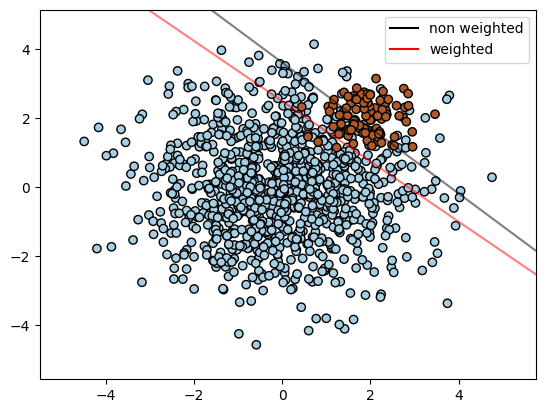

In [9]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

# Summary

In this lab, we learned how to use Support Vector Machines (SVM) for classes that are unbalanced. We used the **make_blobs** function to create two clusters of random points and created two SVM models, one with plain SVM and another with automatic correction for unbalanced classes. We plotted the samples and the decision functions for both classifiers and added a legend to the plot.